In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [2]:
def target_func(x):
    return (x - 0.7) * (x + 0.2) - 0.5

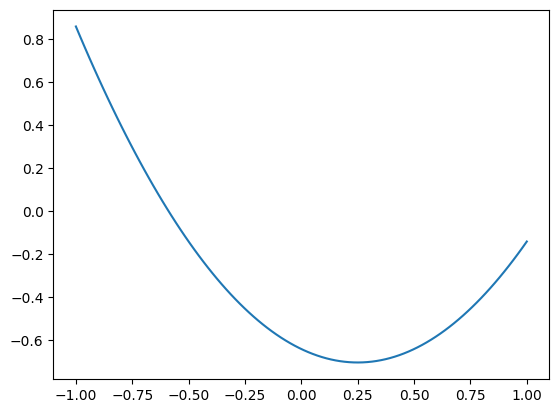

In [3]:
xs = np.linspace(-1, 1, 100)
ys = target_func(xs)
plt.plot(xs, ys)

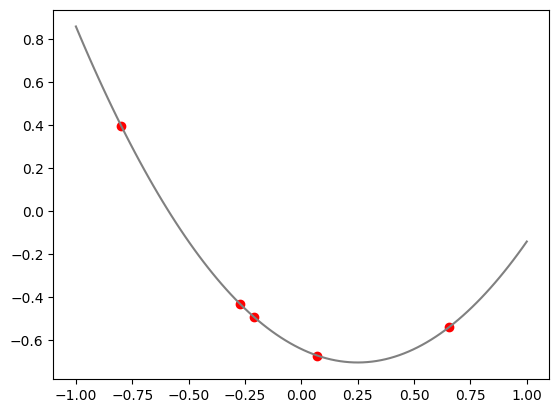

In [10]:
xtrain = np.random.choice(np.linspace(-1, 1, 100), 5)
ytrain = target_func(xtrain)

plt.plot(xs, ys, c="gray")
plt.scatter(xtrain, ytrain, c="r")

- parameters: list of trainable parameters
- indices: list of qubit-index of gate
- gates: list of gate
- istrainable: list of flags to represent trainable gate
    - bool: is itrainable

In [55]:
def predict(params):
    sim = AerSimulator()
    shots = 100
    ps = []
    for xt in xtrain:
        qc = QuantumCircuit(2, 1)
        # input layer
        qc.rx(xt, 0) 
        qc.ry(xt, 1)        
        qc.cz(0, 1)
        
        # model
        qc.rx(params[0], 0)
        qc.rz(params[1], 0)
        qc.rx(params[2], 1)
        qc.rz(params[3], 1)
        qc.cz(0, 1)
        
        qc.rx(params[4], 0)
        qc.rz(params[5], 0)
        qc.rx(params[6], 1)
        qc.rz(params[7], 1)
        qc.cz(0, 1)
        
        qc.measure(0, 0)
    
        job = transpile(qc, sim)
        res = sim.run(job, shots=shots).result().get_counts()
        p = (res.get("0", 0) - res.get("1", 0)) / shots
        ps.append(p)
    return np.asarray(ps)

In [57]:
predict(np.random.rand(8))

array([-0.04,  0.3 ,  0.32,  0.62,  0.82])

In [58]:
def fun(param):
    ps = predict(param)
    es = ps - np.asarray(ytrain)
    loss = 0.5 * np.mean(np.square(es))
    return loss

In [63]:
ranges = ((0, 2 * np.pi), ) * 8

In [64]:
res = minimize(fun, np.random.rand(8), method="L-BFGS-B", bounds=ranges)
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.2103620563383352
        x: [ 4.546e-01  6.835e-02  1.121e-01  9.707e-01  9.731e-01
             6.432e-01  3.295e-01  3.206e-01]
      nit: 4
      jac: [-3.617e+06  6.589e+06 -2.041e+06  1.823e+06  1.051e+06
             6.009e+05  2.827e+06  4.111e+05]
     nfev: 342
     njev: 38
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>

In [66]:
res = minimize(fun, np.random.rand(8), method="SLSQP", bounds=ranges)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0808237602460997
       x: [ 9.048e-01  1.784e-01  5.405e-01  1.809e-01  9.711e-01
            8.250e-01  3.565e-01  8.396e-01]
     nit: 5
     jac: [-1.586e+05 -1.880e+06  8.431e+05 -6.102e+05 -5.952e+05
           -1.272e+06  9.064e+05  2.281e+05]
    nfev: 9
    njev: 1